# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assess">Assesing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data </a></li>
<li><a href="#ana">Analysing and Visualizing</a></li>
<li><a href="#ana">Conclusion</a></li>   
</ul>

<a id='intro'></a>
## Introduction
Data wrangling is a term that describes one of the earliest stages of data analysis. It is the process of gathering raw data in different formats and  making them more appropriate for use in a suitable format.
It involves gathering data from different sources and making them more suitable and appropriate for a particular kind of analysis. Steps involved in data wrangling include and are not limited to;
* Merging several data sources into one data-set for analysis.
* Identifying gaps or empty cells in data and either filling or removing them.
* Deleting irrelevant or unnecessary data.
* Identifying severe outliers in data and either explaining the inconsistencies or deleting them.

In this project, I am expected to;
- wrangle data.
    - gather data.
    - access data and.
    - clean data.
- store, analyse and visualise wrangled data.
- make reports on data wrangling and data analysis.

In [49]:
# importing all required libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
from time import time
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='gathering'></a>
## Data Gathering

Data was gathered according to instructions from the udacity learning platform.
* A csv file containing an archive of tweets from an account *we rate dogs* with 5000+ tweets was manually downloaded and read into a dataframe **twitter_archive_df**.
* A tsv file *image predictions tsv*, was read into a dataframe **image_predictions_df** through requests library.
* The third data was to be queried from tweepy via twitter APIs. My developer account varificatio was unsuccessful so I'm taking the alternative route provided on the udacity platform to query my data.

In [50]:
# reading the given twitter_archive_enhanced csv file into a pandas dataframe
twitter_archive_df = pd.read_csv('twitter_archive_enhanced.csv')
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Using the Requests library to download the tweet image prediction file (image_predictions.tsv) hosted on udacity server.

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [51]:
# reading the downloaded image_prediction tsv file into a pandas dataframe
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# using tweepy library
CONSUMER_KEY = 
CONSUMER_SECRET = 
ACCESS_TOKEN = 
ACCESS_TOKEN_SECRET = 

#Pass in your twitter API authentication key
auth = tweepy.OAuth1UserHandler(
    CONSUMER_KEY, CONSUMER_SECRET,
    ACCESS_TOKEN, ACCESS_TOKEN_SECRET
)

#Instantiate the tweepy API
api = tweepy.API(auth, wait_on_rate_limit=True)
display(api)

In [5]:
# Getting tweet JSON data via tweet ID using Tweepy
tweet_ids = list(twitter_archive_df['tweet_id'])


# creating a list for tweets and noting tweets with exceptions/errors 
tweets_data = []
tweet_errors = []


start = time() # code execution start time

# Iteration to add each available tweet json to tweets_data and flag unavailable tweets
for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        # from the tweets json, extract the favorite_count, retweet_count and the time of creation
        favorites = tweet['favorite_count'] # number of likes for each tweet_id
        retweets = tweet['retweet_count'] # number of retweets for each tweet_id
        timestamp = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet

        
        tweets_data.append({'tweet_id': int(tweet_id),
                            'favorites': int(favorites),
                            'retweets': int(retweets),
                            'timestamp': pd.to_datetime(timestamp)})
    except Exception as e:
        print("tweet ID: " + str(tweet_id)+ " _ " + "error: " + str(e))
        tweet_errors.append(tweet_id)
        

end = time() # code execution end time 

print(f"Time taken for to query the Twitter API is {end - start}secs") # displaying the execution time

tweet ID: 888202515573088257 _ error: 404 Not Found
144 - No status found with that ID.
tweet ID: 877611172832227328 _ error: 403 Forbidden
179 - Sorry, you are not authorized to see this status.
tweet ID: 873697596434513921 _ error: 404 Not Found
144 - No status found with that ID.
tweet ID: 872668790621863937 _ error: 404 Not Found
144 - No status found with that ID.
tweet ID: 872261713294495745 _ error: 404 Not Found
144 - No status found with that ID.
tweet ID: 869988702071779329 _ error: 404 Not Found
144 - No status found with that ID.
tweet ID: 866816280283807744 _ error: 404 Not Found
144 - No status found with that ID.
tweet ID: 861769973181624320 _ error: 404 Not Found
144 - No status found with that ID.
tweet ID: 856602993587888130 _ error: 404 Not Found
144 - No status found with that ID.
tweet ID: 856330835276025856 _ error: 404 Not Found
144 - No status found with that ID.
tweet ID: 851953902622658560 _ error: 404 Not Found
144 - No status found with that ID.
tweet ID: 85

Rate limit reached. Sleeping for: 204


tweet ID: 757597904299253760 _ error: 404 Not Found
34 - Sorry, that page does not exist.
tweet ID: 754011816964026368 _ error: 404 Not Found
144 - No status found with that ID.
tweet ID: 680055455951884288 _ error: 404 Not Found
144 - No status found with that ID.


Rate limit reached. Sleeping for: 71


Time taken for to query the Twitter API is 2256.893917798996secs


In [16]:
# total tweets received from the Twitter API
print(f'length of result: {len(tweets_data)}')

# Total tweets with error
print(f'length of errors: {len(tweet_errors)}')

length of result: 2325
length of errors: 31


In [17]:
# creating DataFrames
tweets_data_json_df = pd.DataFrame(tweets_data, columns = ['tweet_id', 'favorites', 'retweets', 'timestamp'])

# saving the dataFrame to a .txt file
tweets_data_json_df.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [52]:
# read the saved tweet_json.txt file into a dataframe

tweets_data_df = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweets_data_df.head()
tweets_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2325 non-null   int64 
 1   favorites  2325 non-null   int64 
 2   retweets   2325 non-null   int64 
 3   timestamp  2325 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


#### The Data Gathering process was completed successfully.

- I have downloaded ad uploaded **`twitter_archive_enhanced.csv`** and read it into a Pandas DataFrame.
- I have downloaded **`image_prediction.tsv`** from the provided URL using the `Request` library.
- I have queried each tweet's retweet count and favorite ("like") count using the `Tweepy` library and stored the data in **`tweet_json.txt`**.
- I have read the `tweet_json.txt` line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count.

<a id='assess'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Accessing Twitter Archive Dataframe

#### Visual Assessment

In [133]:
# checking 5 random rows in the dataframe
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1183,718939241951195136,NaN,NaN,2016-04-09 23:10:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. Everybody look at Otis. 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718939241...,12,10,Otis,None,None,None,None
1035,744995568523612160,NaN,NaN,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,None,None,None,puppo
1591,686606069955735556,NaN,NaN,2016-01-11 17:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Horace. He was practicing his levitation,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/686606069...,10,10,Horace,None,None,None,None
208,852311364735569921,NaN,NaN,2017-04-13 00:03:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wiggles. She would like you to spot he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852311364...,13,10,Wiggles,None,None,None,None
612,796904159865868288,NaN,NaN,2016-11-11 02:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Tyrone. He's a leaf wiz...,6.873173e+17,4.196984e+09,2016-01-13 16:56:30 +0000,https://twitter.com/dog_rates/status/687317306...,11,10,Tyrone,None,None,None,None


#### Programmatic Assessment

In [9]:
# get a general overview of the dataframe features.
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# check for number of duplicated rows
twitter_archive_df.duplicated().sum()

0

In [11]:
# check for entries in the tweet_id column
twitter_archive_df.tweet_id.duplicated().sum()

0

In [12]:
# check the number of unique elements in each column
twitter_archive_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [13]:
# check the number of retweets in the dataset
twitter_archive_df.in_reply_to_status_id.count()

78

In [14]:
twitter_archive_df.in_reply_to_status_id.dtype

dtype('float64')

In [15]:
# check the number of times each unique entry occurs in the source column
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
# view descriptive statistics for each feature in the twitter_archive table
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

### Accessing Image Prediction Dataframe

#### Visual Assessment

In [18]:
# checking the top 5 and bottom 5 rows of the dataframe for data quality and tidiness issues
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
# checking 5 random rows in the dataframe
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True
1744,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
1672,813112105746448384,https://pbs.twimg.com/media/C0jBJZVWQAA2_-X.jpg,1,dingo,0.287369,False,Pembroke,0.140682,True,basenji,0.090819,True
699,684594889858887680,https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg,1,Weimaraner,0.948688,True,English_setter,0.035352,True,Brittany_spaniel,0.003879,True
603,679844490799091713,https://pbs.twimg.com/media/CW9K9VeVAAE0j-x.jpg,1,Airedale,0.903832,True,Border_terrier,0.034713,True,toy_poodle,0.021378,True
247,670668383499735048,https://pbs.twimg.com/media/CU6xVkbWsAAeHeU.jpg,1,banana,0.107317,False,orange,0.099662,False,bagel,0.089033,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,0.012601,False,coyote,0.000057,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
1560,793271401113350145,https://pbs.twimg.com/media/CwJEIKTWYAAvL-T.jpg,1,Siberian_husky,0.231695,True,Eskimo_dog,0.206749,True,Pembroke,0.070120,True
189,669375718304980992,https://pbs.twimg.com/media/CUoZqaqWcAAA2MQ.jpg,1,Airedale,0.168762,True,Norfolk_terrier,0.107479,True,Lakeland_terrier,0.097846,True


#### Programmatic Assessment

In [20]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# general descriptive statistics of the dataframe
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
image_predictions_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [24]:
# check the distribution of the unique values for the img_num value
image_predictions_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [25]:
# check if come images are not of dogs based on the image prediction variables
image_predictions_df.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

### Accessing Twitter API Dataframe

#### Visual Assessment

In [26]:
tweets_data_df

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,33599,6950,2017-08-01 16:23:56+00:00
1,892177421306343426,29141,5252,2017-08-01 00:17:27+00:00
2,891815181378084864,21928,3458,2017-07-31 00:18:03+00:00
3,891689557279858688,36652,7158,2017-07-30 15:58:51+00:00
4,891327558926688256,35045,7698,2017-07-29 16:00:24+00:00
...,...,...,...,...
2320,666049248165822465,88,36,2015-11-16 00:24:50+00:00
2321,666044226329800704,245,114,2015-11-16 00:04:52+00:00
2322,666033412701032449,100,36,2015-11-15 23:21:54+00:00
2323,666029285002620928,112,39,2015-11-15 23:05:30+00:00


In [27]:
tweets_data_df.sample(10)

,tweet_id,favorites,retweets,timestamp
191,853760880890318849,25934,5094,2017-04-17 00:03:50+00:00
806,768609597686943744,3830,1091,2016-08-25 00:43:02+00:00
766,773985732834758656,10093,3558,2016-09-08 20:45:53+00:00
1807,675898130735476737,1439,505,2015-12-13 04:40:46+00:00
1241,709409458133323776,2417,615,2016-03-14 16:02:49+00:00
1028,741793263812808706,4204,1381,2016-06-12 00:44:30+00:00
352,828409743546925057,6007,1072,2017-02-06 01:07:28+00:00
1768,677187300187611136,2478,804,2015-12-16 18:03:28+00:00
851,760893934457552897,3559,879,2016-08-03 17:43:45+00:00
849,761227390836215808,4967,1433,2016-08-04 15:48:47+00:00


#### Programmatic Assessment

In [28]:
tweets_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2325 non-null   int64 
 1   favorites  2325 non-null   int64 
 2   retweets   2325 non-null   int64 
 3   timestamp  2325 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [29]:
tweets_data_df.describe()

,tweet_id,favorites,retweets
count,2.325000e+03,2325.000000,2325.000000
mean,7.417278e+17,7010.868387,2453.129032
std,6.817828e+16,10884.736967,4151.549783
min,6.660209e+17,0.000000,1.000000
25%,6.780233e+17,1220.000000,493.000000
50%,7.177900e+17,3031.000000,1143.000000
75%,7.986440e+17,8557.000000,2842.000000
max,8.924206e+17,143711.000000,70055.000000


### Quality issues discovered
1. Nondescriptive Column headers (Visual Assessment)
2. Unclear source entires and wrong datatype
3. The in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls columns contain null values
4. Datatype error: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are floats
5. 'None' instead of NaN in doggo, floofer, pupper and puppo columns
6. Based off of the image prediction results, not all images contain dogs
7. Wrong datatype for timestamp variables
8. 181 retweets included in the dataset
9. 78 status replies included in the dataset

### Tidiness issues discovered
1. All the prediction columns represent information on one variable i.e. The type of dog.
2. Unused Columns: img_num not needed for the analysis
3. multiple tables for the same observational unit
4. The columns: doggo, floofer, pupper and puppo all represent thesame variable i.e the dogs' trait
5. The columns: rating_numerator and rating_denominator both represent thesame variable i.e the dogs' rating

<a id='clean'></a>
## Cleaning Data

Cleaning the gathered dataset in preparation for explorationa dn visualizations. This helps present misleading exploration results. Without cleaning, the exploration will probably not work.

In [53]:
# Make copies of original pieces of data

twitter_archive_clean_df = twitter_archive_df.copy()
image_predictions_clean_df = image_predictions_df.copy()
tweets_data_clean_df = tweets_data_df.copy()

### Issue: multiple tables for the same observational unit

#### Define
Create a single table for the dataset by merging all 3 dataframes.

#### Code

In [54]:
# creating a single dataframe

twitter_archive_clean_df = pd.merge(left=twitter_archive_clean_df, right=tweets_data_clean_df, left_on='tweet_id', right_on='tweet_id', how='inner')

twitter_archive_clean_df = twitter_archive_clean_df.merge(image_predictions_clean_df, on='tweet_id', how='inner')

#### Test

In [55]:
twitter_archive_clean_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


### Issue: Data type issues

#### Define
Use the `.astype()` method to set the right datatypes where possible

#### Code

In [56]:
# change timestamp_x to datatime
twitter_archive_clean_df.timestamp_x = pd.to_datetime(twitter_archive_clean_df.timestamp_x)

# change retweeted_status_timestamp to datatime
twitter_archive_clean_df.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean_df.retweeted_status_timestamp)

#### Test

In [57]:
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2054
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2055 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp_x                 2055 non-null   datetime64[ns, UTC]
 4   source                      2055 non-null   object             
 5   text                        2055 non-null   object             
 6   retweeted_status_id         69 non-null     float64            
 7   retweeted_status_user_id    69 non-null     float64            
 8   retweeted_status_timestamp  69 non-null     datetime64[ns, UTC]
 9   expanded_urls               2055 non-null   object             
 10  rating_numerator            2055 non-null   int64           

Note the columns with null values cannnot be represented as intergers. For this reason we work with them as they are.

### Issue: All the prediction columns represent information on one variable i.e. The type of dog.

#### Define:
combine p1, p2 and p3 columns and their associated confidence levels based on whether or not the prediction is a breed of dog.

#### Code

In [58]:
# create a unified list of predicted breeds.

breed_prediction = []
prediction_confidence = []

def check_prediction(dataframe):
    if dataframe['p1_dog'] == True:
        breed_prediction.append(dataframe['p1'])
        prediction_confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        breed_prediction.append(dataframe['p2'])
        prediction_confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        breed_prediction.append(dataframe['p3'])
        prediction_confidence.append(dataframe['p3_conf'])
    else:
        breed_prediction.append(np.nan)
        prediction_confidence.append(np.nan)

twitter_archive_clean_df.apply(check_prediction, axis=1)
twitter_archive_clean_df['breed_prediction'] = breed_prediction
twitter_archive_clean_df['prediction_confidence'] = prediction_confidence

#### Test

In [59]:
# use the prediction information to determine which images may not be of dogs.

twitter_archive_clean_df[twitter_archive_clean_df.breed_prediction.isnull()].jpg_url

0         https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
21      https://pbs.twimg.com/ext_tw_video_thumb/88751...
27        https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg
51        https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg
52        https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg
                              ...                        
2029      https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg
2033      https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg
2036      https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg
2037      https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg
2048      https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
Name: jpg_url, Length: 320, dtype: object

In [60]:
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2054
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2055 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp_x                 2055 non-null   datetime64[ns, UTC]
 4   source                      2055 non-null   object             
 5   text                        2055 non-null   object             
 6   retweeted_status_id         69 non-null     float64            
 7   retweeted_status_user_id    69 non-null     float64            
 8   retweeted_status_timestamp  69 non-null     datetime64[ns, UTC]
 9   expanded_urls               2055 non-null   object             
 10  rating_numerator            2055 non-null   int64           

### Issue: The columns: doggo, floofer, pupper and puppo all represent thesame variable

#### Define:
Combine all four columns into one using the `.melt()` function

#### Code

In [61]:
trait = []

def trait_check(dataframe):
    if dataframe['doggo'] == 'doggo':
        trait.append(dataframe['doggo'])
    elif dataframe['pupper'] == 'pupper':
        trait.append(dataframe['pupper'])
    elif dataframe['puppo'] == 'puppo':
        trait.append(dataframe['puppo'])
    elif dataframe['floofer'] == 'floofer':
        trait.append(dataframe['floofer'])
    else:
        trait.append(np.nan)

twitter_archive_clean_df.apply(trait_check, axis=1)
twitter_archive_clean_df['trait'] = trait

#### Test

In [62]:
print(f"{'trait' in list(twitter_archive_clean_df.columns)}")

True


### Issue: Unclear source entries and wrong data type

#### Define:
Use regular expression to extract the useful part of the source text

#### Code

In [63]:
# extract th useful part of each entry
twitter_archive_clean_df['source'] = twitter_archive_clean_df['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

# change to category datatype
twitter_archive_clean_df['source'] = twitter_archive_clean_df['source'].astype("category")

#### Test

In [64]:
print(twitter_archive_clean_df['source'].dtype)
twitter_archive_clean_df['source'].value_counts()

category


Twitter for iPhone    2015
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

### Issue: Some retweets still included in the dataset

#### Define:
Extract and retain only the rows with null entries in their retweeted_status_id column.

#### Code

In [65]:
# Delete the retweet data

twitter_archive_clean_df = twitter_archive_clean_df[pd.isnull(twitter_archive_clean_df.retweeted_status_id)]

#### Test

In [66]:
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2054
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1986 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp_x                 1986 non-null   datetime64[ns, UTC]
 4   source                      1986 non-null   category           
 5   text                        1986 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               1986 non-null   object             
 10  rating_numerator            1986 non-null   int64           

### Issue: Some status replies still included in the dataset

#### Define:
Extract and retain only the rows with null entries in their in_reply_to_status_id column.

#### Code

In [67]:
# remove the status reply rows from the dataframe

twitter_archive_clean_df = twitter_archive_clean_df[pd.isnull(twitter_archive_clean_df.in_reply_to_status_id)]

#### Test

In [68]:
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2054
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1963 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp_x                 1963 non-null   datetime64[ns, UTC]
 4   source                      1963 non-null   category           
 5   text                        1963 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               1963 non-null   object             
 10  rating_numerator            1963 non-null   int64           

### Issue: The columns: rating_numerator and rating_denominator both represent thesame variable i.e the dogs' rating

#### Define:
Create a new feature **calculated_rating** by dividing the rating_numerator by the rating_denominator.

#### Code

In [69]:
# create a new column for calculated_rating

twitter_archive_clean_df['calculated_rating'] = twitter_archive_clean_df.rating_numerator * 10 / twitter_archive_clean_df.rating_denominator

#### Test

In [70]:
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2054
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1963 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp_x                 1963 non-null   datetime64[ns, UTC]
 4   source                      1963 non-null   category           
 5   text                        1963 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               1963 non-null   object             
 10  rating_numerator            1963 non-null   int64           

### Issue: Duplicated and unused columns in the dataset

#### Define:
Drop the unused and duplicate columns using the `drop()` method.

#### Code

In [71]:
# Delete columns we don't need anymore

for col in ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf', 'img_num', 'timestamp_y', 'doggo', 'floofer', 'pupper', 'puppo', 'in_reply_to_status_id', 'in_reply_to_user_id', 'rating_denominator', 'rating_numerator']:
    twitter_archive_clean_df = twitter_archive_clean_df.drop(col, 1)


C:\Users\chidinma\AppData\Local\Temp\ipykernel_18116\1137995281.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_clean_df = twitter_archive_clean_df.drop(col, 1)
C:\Users\chidinma\AppData\Local\Temp\ipykernel_18116\1137995281.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_clean_df = twitter_archive_clean_df.drop(col, 1)
C:\Users\chidinma\AppData\Local\Temp\ipykernel_18116\1137995281.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_clean_df = twitter_archive_clean_df.drop(col, 1)
C:\Users\chidinma\AppData\Local\Temp\ipykernel_18116\1137995281.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keywo

#### Test

In [72]:
twitter_archive_clean_df.head(3)

,tweet_id,timestamp_x,source,text,expanded_urls,name,favorites,retweets,jpg_url,breed_prediction,prediction_confidence,trait,calculated_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,33599,6950,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,NaN,13.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,29141,5252,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,NaN,13.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,21928,3458,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,NaN,12.0


### Issue: More explicit column names

#### Define:
Use the rename function to change some column headers.

#### Code

In [73]:
# give table more descriptive column headers

twitter_archive_clean_df = twitter_archive_clean_df.rename(columns={'timestamp_x': 'timestamp',
                                     'source': 'tweet_source',
                                     'retweets': 'no_of_retweets',
                                     'name': 'dog_name',
                                     'text': 'tweet',
                                     'favorites': 'no_of_likes',
                                     'trait': 'dog_trait',
                                    }
                           )

#### Test

In [74]:
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2054
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1963 non-null   int64              
 1   timestamp              1963 non-null   datetime64[ns, UTC]
 2   tweet_source           1963 non-null   category           
 3   tweet                  1963 non-null   object             
 4   expanded_urls          1963 non-null   object             
 5   dog_name               1963 non-null   object             
 6   no_of_likes            1963 non-null   int64              
 7   no_of_retweets         1963 non-null   int64              
 8   jpg_url                1963 non-null   object             
 9   breed_prediction       1658 non-null   object             
 10  prediction_confidence  1658 non-null   float64            
 11  dog_trait              302 non-null    object           

### Issue: Wrong datatype for the dog_trait feature

#### Define:
Change the dog_trait datatype to category using the `astype()` method

#### Code

In [75]:
# set the dog_trait feature to category datatype
twitter_archive_clean_df.dog_trait = twitter_archive_clean_df.dog_trait.astype("category")

#### Test

In [76]:
twitter_archive_clean_df.dtypes

tweet_id                               int64
timestamp                datetime64[ns, UTC]
tweet_source                        category
tweet                                 object
expanded_urls                         object
dog_name                              object
no_of_likes                            int64
no_of_retweets                         int64
jpg_url                               object
breed_prediction                      object
prediction_confidence                float64
dog_trait                           category
calculated_rating                    float64
dtype: object

All the features/columns are now properly represented with the right datatypes.

<a id='store'></a>
## Storing Data
Saving the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

Saving the cleaned dataset is done using the `to_csv()` pandas method 

In [78]:
# saving the cleaned dataset to file
twitter_archive_clean_df.to_csv("twitter_archive_master.csv", index=False)

<a id='ana'></a>
## Analyzing and Visualizing Data
After accesing and cleaning the dataset, analysis can then be carried out and plot visualizations produced to show trends relationships among different variables in our dataset, from which valuable insight can be made.

### Exploring the dataset

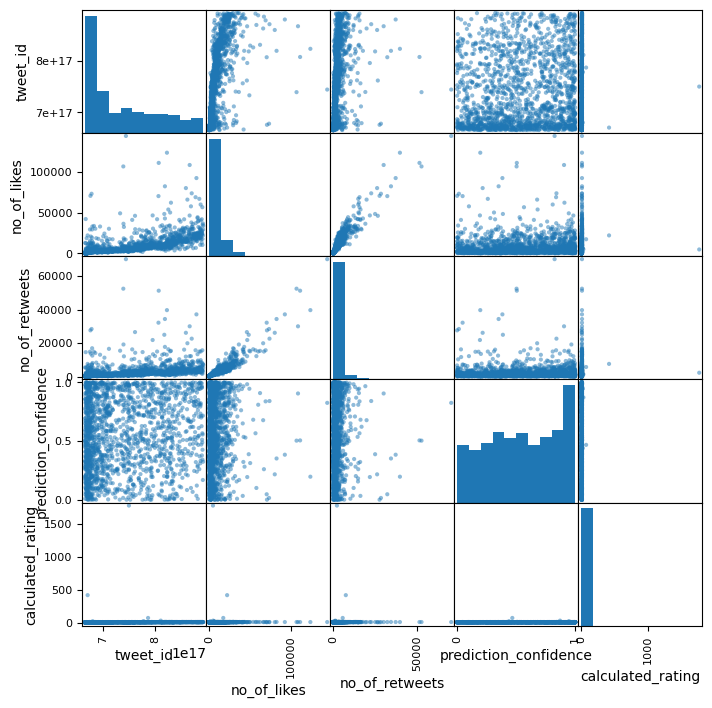

In [79]:
# explore the correlation among numerical features

pd.plotting.scatter_matrix(twitter_archive_clean_df, figsize=(8,8));

Here, we see that as expected, there is a high correlation between number of likes for a tweet and it's retweet count.

In [80]:
# explore the relationship between tweet_source and the number of likes using descriptive statistics

twitter_archive_clean_df.groupby('tweet_source').describe().no_of_likes

,count,mean,std,min,25%,50%,75%,max
tweet_source,,,,,,,,
TweetDeck,10.0,3830.300000,2849.397365,2010.0,2588.25,2943.5,3210.00,11668.0
Twitter Web Client,28.0,5114.000000,7940.063938,170.0,328.25,596.5,6459.25,29289.0
Twitter for iPhone,1925.0,7760.591169,11407.170563,66.0,1692.00,3497.0,9655.00,143711.0


### Drawing Conclusion

####  Tweets characteristics based on tweet source

Twitter for iPhone    98.064187
Twitter Web Client     1.426388
TweetDeck              0.509424
Name: tweet_source, dtype: float64

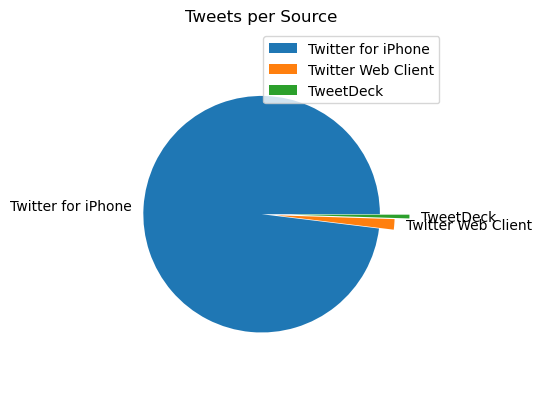

In [81]:
# group the dataframe based on tweets per source
tweet_percentage_per_source = twitter_archive_clean_df.tweet_source.value_counts()*100/(twitter_archive_clean_df.tweet_source.count())
display(tweet_percentage_per_source)

labels = twitter_archive_clean_df.tweet_source.unique().tolist()

explode = [0, 0.1, 0.2]
plt.pie(tweet_percentage_per_source, explode = explode, labels = labels, radius = 0.8);
plt.legend();
plt.title('Tweets per Source');

Here it's clear that most of the tweets sent by @WeRateDogs within the period of study are sent through Twitter for iPhone.

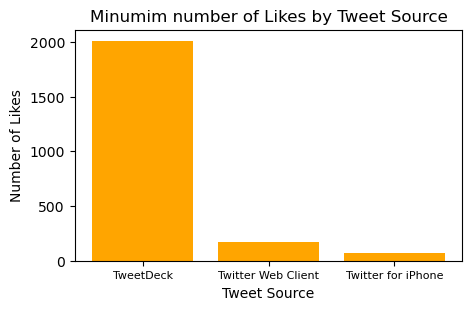

In [82]:
# group the dataframe based on minimum number of likes for each tweet_source
min_likes_per_source = twitter_archive_clean_df.groupby('tweet_source').no_of_likes.min()
labels = min_likes_per_source.index

locations = [1, 2, 3]
heights = min_likes_per_source
ab = plt.figure(figsize=(5,3))
plt.bar(locations, heights, tick_label=labels, color='orange')
plt.xticks(fontsize=8);
plt.xticks(fontsize=8);
plt.title('Minumim number of Likes by Tweet Source')
plt.xlabel('Tweet Source')
plt.ylabel('Number of Likes');

We see clearly from the chart that the least number of likes a post got is far higher than of the other sources.

#### Tweets characteristics based on timestamp

In [83]:
# define a functon for plottiing timeline graphs
def plot_timestamp(vs_col):
    a = twitter_archive_clean_df.groupby(pd.Grouper(key='timestamp', axis=0, freq='M')).sum()[vs_col]
    a_df = pd.Series(a)
    
    a_df.plot(x=a.index, y=a, figsize=(7,4), color='Purple');

    print(f"{np.array(a[a == a.max()].index.to_period('M'))[0]} had the highest {vs_col}")

2015-12 had the highest no_of_retweets


C:\Users\chidinma\New folder\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


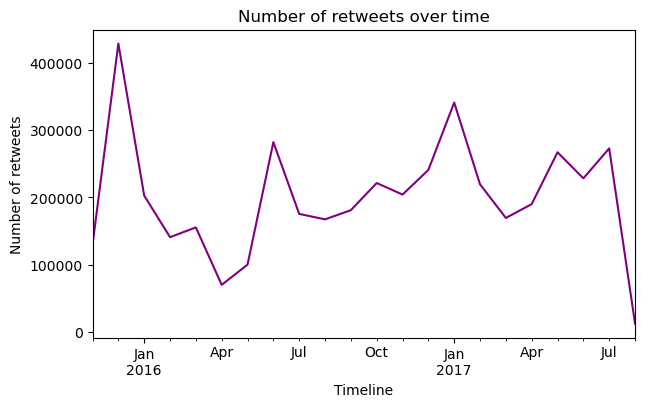

In [84]:
# exploring the relationship between timestamp and retweets
plot_timestamp('no_of_retweets');
plt.title('Number of retweets over time');
plt.xlabel('Timeline');
plt.ylabel('Number of retweets');

From this line graph, we see clearly that @WeRateDogs got it's highest number of retweets in December 2015.

C:\Users\chidinma\New folder\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


2017-07 had the highest no_of_likes


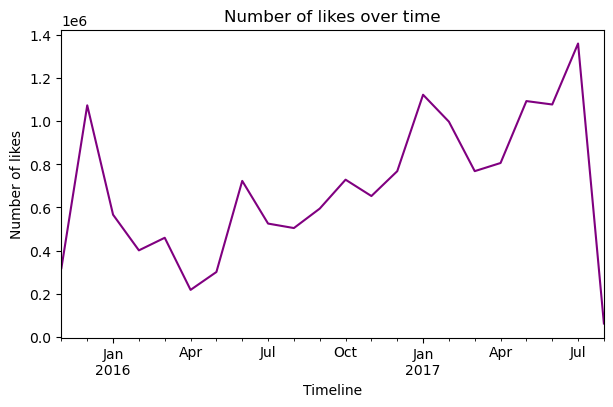

In [85]:
# exploring the relationship between timestamp and no of likes
plot_timestamp('no_of_likes');
plt.title('Number of likes over time');
plt.xlabel('Timeline');
plt.ylabel('Number of likes');

From this line graph, we see clearly that @WeRateDogs got it's highest number of likes in July 2017.

C:\Users\chidinma\New folder\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


2016-07 had the highest average rating


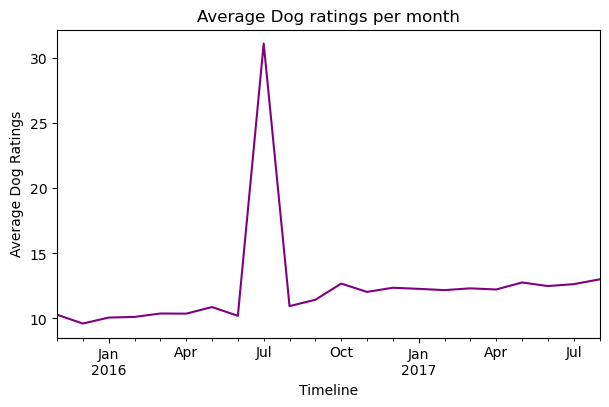

In [86]:
# exploring the relationship between timestamp and rating
a = twitter_archive_clean_df.groupby(pd.Grouper(key='timestamp', axis=0, freq='M')).mean()['calculated_rating']
a_df = pd.Series(a)

print(f"{np.array(a[a == a.max()].index.to_period('M'))[0]} had the highest average rating")
a_df.plot(x=a.index, y=a, figsize=(7,4), color='Purple');
plt.title('Average Dog ratings per month');
plt.xlabel('Timeline');
plt.ylabel('Average Dog Ratings');

From this line graph, we see clearly that July 2016 had the highest average rating for the period of study.

#### Most loved dog traits based on rating given

dog_trait
doggo      11.777778
floofer    12.000000
pupper     10.716418
puppo      12.000000
Name: calculated_rating, dtype: float64


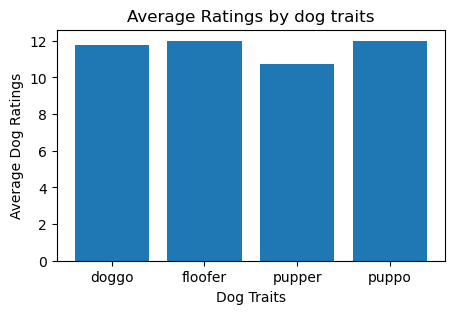

In [87]:
# group the dataframe average ratings for each dog_traits
trait_ratings = twitter_archive_clean_df.groupby('dog_trait').mean().calculated_rating
labels = trait_ratings.index

print(trait_ratings)

locations = [1, 2, 3, 4]
heights = trait_ratings
ab = plt.figure(figsize=(5,3))
plt.bar(locations, heights, tick_label=labels, )
plt.title('Average Ratings by dog traits')
plt.xlabel('Dog Traits')
plt.ylabel('Average Dog Ratings');

From the chart above, puppo and floofer are the most highly rated dog characteristics or traits.

<a id='conclusion'></a>
## Conclusion / Insights:
>1. Over 98% of the tweets sent by @WeRateDogs are sent through Twitter for iPhone. However, owing to the tools provided by the TweetDeck platform, tweets from there have minimum like count of 2010 (Way higher than the other sources).
>2. Tweets made by @WeRateDogs in December, 2015  have the highest number of retweets while tweets  made in July 2017 had the highest number of likes. July 2016 had the highest average dog ratings of the period considered. This seems interesing and would require further investigation.
>3. From the analysis carried out, puppo and floofer are the most highly rated dog characteristics or traits.